<a href="https://colab.research.google.com/github/Asna777/Minor-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install bing-image-downloader

In [29]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [30]:
from bing_image_downloader import downloader
downloader.download("cats image",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn.designbump.com/wp-content/uploads/2014/09/funny-jumping-cats-94__880.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://wanna-joke.com/wp-content/uploads/2013/11/funny-picture-monday-morning-workout.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://lomets.com/wp-content/uploads/2016/06/97ac2c45590d8448fcca888f83ccf8f9.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.trendzified.net/wp-content/uploads/2014/10/upnqw-cats7.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://ruinmyweek.com/wp-content/uploads/2017/05/funny-photos-of-dogs-afraid-of-funny-things-dog-on-owners-back-scared-of-vacuum.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.chzbgr.com/original/7162250240/h8C52629F/cheezburger-image-7162250240
[%] File Downloaded !

[%] Downloading Image #7 from http://www.top13.net/wp-content/uploads/2017/03/laz

In [31]:
from bing_image_downloader import downloader
downloader.download("dogs image",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://i1.ytimg.com/vi/5a1T-SARjL8/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.fengshui-import.com/images/products/large_928_11030922.JPG
[%] File Downloaded !

[%] Downloading Image #3 from http://photos.costume-works.com/full/stormtrooper_dog1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://wac.450f.edgecastcdn.net/80450F/thefw.com/files/2012/10/tumblr_mao6glM9lT1r2qjaxo1_400-e1350499709592.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.gamepur.com/files/imagepicker/6/watch-dogs-in-game-screen-2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://i1.ytimg.com/vi/KQN8aawi5vs/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.organic-pet-digest.com/images/dog-wart-papilloma-or-something-else-21492175.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://www.organic-pet-dig

In [32]:
import numpy as np

a=np.array([1,2])
a.ndim

1

In [33]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage .io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

datadir='/content/images'
categories=['cats image','dogs image']

for category in categories:
  class_num=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [34]:
flat_data[0]

array([0.08169935, 0.04705882, 0.0375817 , ..., 0.4869281 , 0.44346405,
       0.43169935])

<BarContainer object of 2 artists>

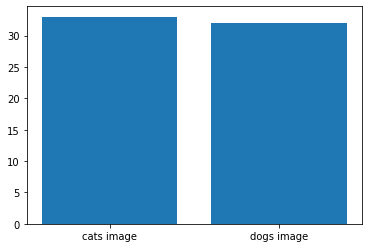

In [35]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=.3,random_state=100)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [39]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
accuracy_score(y_pred,y_test)

0.8

In [42]:
confusion_matrix(y_pred,y_test)

array([[7, 0],
       [4, 9]])

In [43]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [44]:
model=pickle.load(open('img_model.p','rb'))

Enter the URLhttps://www.akc.org/wp-content/themes/akc/component-library/assets/img/welcome.jpg
(452, 400, 3)
Predicted Output:dogs image


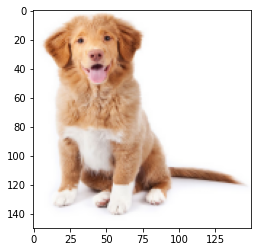

In [54]:
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'Predicted Output:{y_out}')